In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random

In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
base_dir = "/Users/paulineng/Desktop/CS610 AML/GrpProject"
df = pd.read_csv(f"{base_dir}/singapore_airlines_reviews.csv")

In [4]:
df

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


In [5]:
import pandas as pd

# parse (as UTC‐aware) and extract year in one go
df['year'] = pd.to_datetime(df['published_date'], utc=True).dt.year

# group and count
counts_y = (
    df
    .groupby('year')
    .size()
    .reset_index(name='review_count')
)

print(counts_y)

   year  review_count
0  2018          2618
1  2019          5203
2  2020           911
3  2021            85
4  2022           552
5  2023           535
6  2024            96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
 7   year                10000 non-null  int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 586.1+ KB


In [7]:
#Check for null and duplicates in 'Text' column
def check_duplicate_null (df, text_column='text'):
    total_rows = len(df)
    missing_count = df[text_column].isna().sum()
    duplicate_count = df.duplicated(subset=text_column).sum()
    
    print(f"Total rows: {total_rows}")
    print(f"Missing {text_column}: {missing_count}")
    print(f"Duplicates (by '{text_column}' only): {duplicate_count}")

check_duplicate_null(df, text_column='text')

Total rows: 10000
Missing text: 0
Duplicates (by 'text' only): 0


In [8]:
# Check for valid rating scores 1 to 5
out_of_range = df[(df['rating'] < 1) | (df['rating'] > 5)]
print("Number of reviews outside the 1–5 range:", len(out_of_range))

Number of reviews outside the 1–5 range: 0


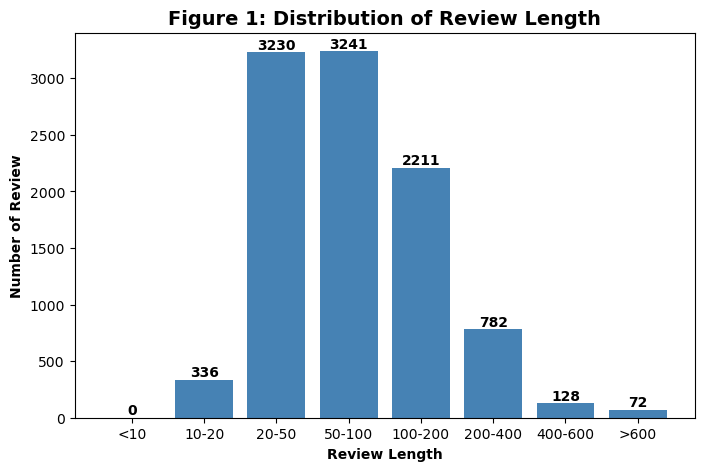

In [9]:
df['review_length_raw'] = df['text'].apply(lambda x: len(str(x).split()))
bins = [0, 10, 20, 50, 100, 200, 400, 600, df['review_length_raw'].max() + 1]
labels = ["<10", "10-20", "20-50", "50-100", "100-200", "200-400", "400-600", ">600"]
df['length_category'] = pd.cut(df['review_length_raw'], bins=bins, labels=labels, right=False)
category_counts = df['length_category'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
bars = plt.bar(
    category_counts.index.astype(str),
    category_counts.values,
    color="steelblue",
    edgecolor='none'
)
plt.title('Figure 1: Distribution of Review Length', fontweight='bold', fontsize=14)
plt.xlabel('Review Length', fontweight='bold')
plt.ylabel('Number of Review', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{int(height)}",
        ha='center',
        va='bottom',
        fontweight='bold'
    )
plt.show()

In [10]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)         
pd.set_option('display.expand_frame_repr', False)

# Filter >600 word reviews 
long_reviews = df[df['review_length_raw'] > 600]

from IPython.display import display
display(long_reviews.head(1))

published_date published_platform  rating    type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

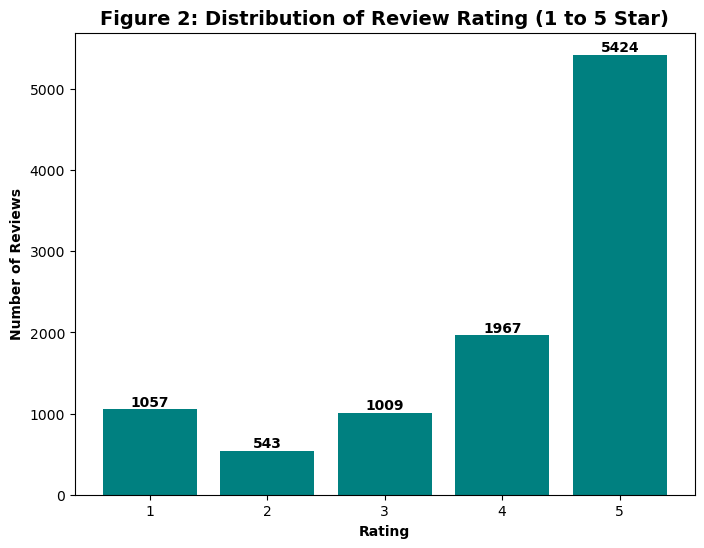

In [11]:
rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='teal')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(int(height)),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Figure 2: Distribution of Review Rating (1 to 5 Star)', fontweight='bold', fontsize=14)
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Number of Reviews', fontweight='bold')
plt.xticks(rating_counts.index)

plt.show()

In [12]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Filter for 3★ reviews
three_star_reviews = df[df['rating'] == 3]
sample_df = three_star_reviews.sample(10, random_state=42)[['rating', 'text']]

display(sample_df)

,rating,text
5911,3,"SQ917 on 12 April 2019\n\nService is always good. Food is good too. But this plane is too old. Tray table to loose, seat cushion is flat and stained, remote not working well. \n\nOverall flight was smooth but delayed for an hour. Waited in the plane for 1.5 hours before taking off."
5945,3,"Travelled on the older 777-200 which needs refurbishment. Paid extra for exit seats but the downside is that you have a fold-out screen which cannot be used during take off or landing and you are right next to the toilets which are a congregating area for other passengers. Entertainment had to be reset 4 times before working, not a great selection either. The steward was less than helpful and shouted at my wife not to touch the remote for 10 minutes. The food was very ordinary and lukewarm when we finally got served. The whole experience was disappointing as we have flown Singapore Airlines before and were impressed but they seem to have fallen back to the pack. Changi airport however is superb."
7100,3,"Everyone knows these people are amongst the best but we had a less than good experience a couple of days ago particularly where the air staff are concerned. They were curt, abrupt and did not make for a nice flight. They barely had time to listen to a request for tea - which should have been part of the meal anyway, and when I got it, it was cold. I was told to turn my light off, even though I was reading - and the choice of films was very poor too. \nI’m assuming this was a one-off experience and fully expect to have their usual high standard on our return flights."
4850,3,Recently travelled to Milan via Singapore with our first leg to Singapore by 777 and found both the plane and service average.I have been a Kris flyer member for many years and have flown Singapore Airlines on numerous occasions for business and pleasure since 1975.\nOn this flight the seats were quite uncomfortable and the meal service poor. The wine selection has definitely deteriorated and there is now no Bourbon on offer which I think is sub standard.\nThey continue to let people on with far to much carry on luggage and do not police the boarding sectors strong enough which just causes chaos. \nI wrote to the airline about our experience and did get a reply but nothing seems to have been done about our issues.\nFlying again to Singapore in the next few months for my 40th time and have booked British Airways as I'm sorry to say I'm disappointed with Singapore Airlines.
3432,3,"This was my second trip from Australia to Europe and back with Singapore Airlines this year and just like last time, it was a very inconsistent experience. The flights from Sydney - Singapore and back were like flying with an entirely different, budget airline. Old, grubby, cramped planes (seriously, WHEN are they going to retire or at least refurbish these horrible old B777s!? They are such an embarrassment for a supposedly world class airline!), food basically inedible and very minimal. At 170cm I'm of average height, yet spent the whole flights with my knees jammed up against the seat in front of me. The European sectors were much better - new, clean A380s, much nicer food, a bit more leg room.\n\nThe staff were mostly pleasant, flights on time, boarding efficient, in-flight entertainment average. Either way, I'm going to choose a different airline next time."
6182,3,"Ok so we paid to have exit row extra legroom seats - we were next to the toilets which wasn’t the end of the world, because the TVs come from between the seats during take off and landing there is no entertainment available.\nThe extra leg room was great!\nUnfortunately upon take off we were the last to be served food so of the 3 choices we were told we were having beef, drink service was hit and miss, my wife said staff seemed to ‘look busy’ to avoid getting drinks. When the snacks came round as a bank of 3 chairs we were basically given 3 items between us - 2 crisps and a sandwich. They did to be fair come

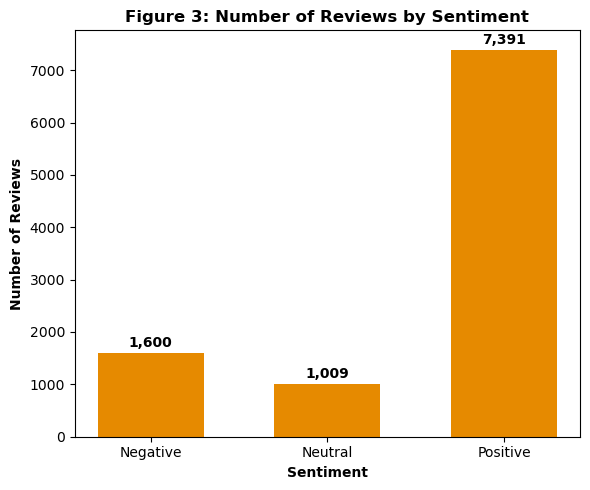

In [13]:
df_filtered = df.copy()  

def map_rating_to_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df_filtered["Sentiment"] = df_filtered["rating"].apply(map_rating_to_sentiment)

counts = df_filtered["Sentiment"] \
            .value_counts() \
            .reindex(["Negative", "Neutral", "Positive"])

plt.figure(figsize=(6,5))
bars = plt.bar(counts.index, counts.values, color="#E68A00", width=0.6)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, h + 50,  # +50 so text sits just above
        f"{int(h):,}",
        ha="center", va="bottom",
        fontsize=10, fontweight="bold"
    )

plt.title("Figure 3: Number of Reviews by Sentiment", fontweight="bold", fontsize=12)
plt.xlabel("Sentiment", fontweight="bold")
plt.ylabel("Number of Reviews", fontweight="bold")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from torch.nn import CrossEntropyLoss
from transformers import Trainer

In [15]:

#Split train / val / test (stratify since there are imbalanced sentiment labels)
#Split 80% train, 20% temp (val+test)
train_df, temp_df = train_test_split(
    df_filtered,
    train_size=0.8,
    random_state=42,
    stratify=df_filtered["Sentiment"]
)

# Split that 20% temp into 10% val and 10% test 
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,                   
    random_state=42,
    stratify=temp_df["Sentiment"]
)

print(f"Train: {len(train_df):>6} rows")
print(f" Val : {len(val_df):>6} rows")
print(f" Test: {len(test_df):>6} rows")
print(f"Total: {len(df_filtered):>6} rows")

Train:   8000 rows
 Val :   1000 rows
 Test:   1000 rows
Total:  10000 rows


In [16]:
label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}
train_df["sentiment_id"] = train_df["Sentiment"].map(label_map)
val_df  ["sentiment_id"] = val_df  ["Sentiment"].map(label_map)
test_df ["sentiment_id"] = test_df ["Sentiment"].map(label_map)

In [17]:
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)